In [1]:
import pandas as pd

data = pd.read_csv("CE802_Ass_2019_Data.csv")
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,0,0,16,2.02,0.52,-2.35,-1.98,-0.70,85,6,-2.07,-0.07,1.08,15,-0.63,-3.49,-1.68,0.02,15.3,NaN,True
1,0,0,86,-0.90,2.75,0.14,0.83,-0.06,107,1,-0.86,0.17,1.06,-8,-1.21,0.34,0.36,0.61,10.1,NaN,True
2,1,1,165,0.73,1.05,0.10,2.57,-1.65,41,5,0.08,0.04,0.42,-6,-0.46,-0.62,1.67,2.60,11.0,1.55,False
3,1,1,191,-1.50,0.79,0.33,1.24,1.35,17,2,-0.85,1.74,1.74,15,0.47,0.63,0.08,0.19,6.3,0.95,False
4,1,1,13,0.25,-1.19,-0.90,2.67,0.22,12,8,0.68,-0.39,1.25,25,-0.09,-2.41,-0.53,-0.77,10.5,NaN,True


In [2]:
print(data.shape) # Shape of the dataset.

(500, 21)


In [3]:
data = data.fillna(data.mean()) # Imputation Using Mean Values.

In [4]:
# Split Dataset into Independent Features (X) and Dependent Features (y).
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# **Embedded Methods**

These methods encompass the benefits of both the wrapper and filter methods by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration.

# **LASSO ($L^{1} $) based Feature Selection.**

[Feature Selection using SelectFromModel](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

clf = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=0).fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(500, 19)

# **Tree-based Feature Selection.**

In [6]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50, random_state = 1).fit(X, y)
# clf = RandomForestClassifier(n_estimators=50, random_state = 1).fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(500, 9)

# **Filter Methods.**

1.   **Forward Selection:** Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.
2.   **Backward Elimination:** In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed in the removal of features.
3.   **Recursive Feature Elimination:** It is a greedy optimization algorithm that aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

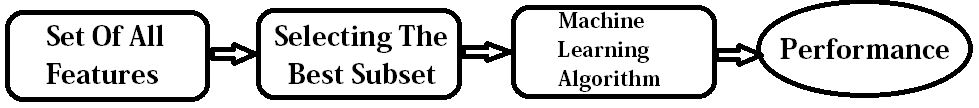






# **Feature Importance using Random Forest.**

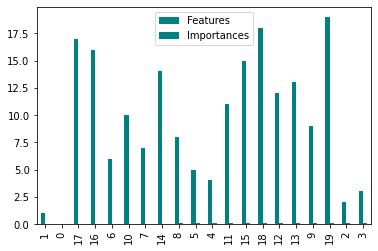

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier with different hyperparameters and fit the model.
clf = RandomForestClassifier(random_state = 1).fit(X, y)

# Find the importance score of all the features.
importances = clf.feature_importances_

# Create Dataframe for Visualization.
final_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances": importances})
final_df.set_index('Importances')

# Sort in Ascending Order.
final_df = final_df.sort_values('Importances')

# Plot the Feature Importance in Bar Graphs.
final_df.plot.bar(color = 'teal')

# **Feature Ranking with Recursive Feature Elimination.**

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

[sklearn.feature_selection.RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)

In [8]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1).fit(X, y)
print(selector.support_)
print(selector.ranking_)

[ True  True False  True False False False False False False False False
  True False False False False False False  True]
[ 1  1 16  1 15 13  3 11 12 14  4  2  1 10  7  5  9  8  6  1]
